# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from scipy import stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
gold_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col=0) 
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col=0)
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col=0)
print(gold_train.info())
gold_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [3]:
print(gold_test.info())
gold_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [4]:
print(gold_full.info())
gold_full.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

Проверим, правильно ли рассчитана эффективность обогащения в обучающей выборке(rougher.output.recovery):  

In [5]:
# создадим отдельный датасет, очищенный от пропусков:
MAE_train = gold_train.dropna()
MAE_train['rougher.output.recovery_true'] =((MAE_train['rougher.output.concentrate_au'] * (MAE_train['rougher.input.feed_au'] - MAE_train['rougher.output.tail_au'])) / (MAE_train['rougher.input.feed_au'] * (MAE_train['rougher.output.concentrate_au'] - MAE_train['rougher.output.tail_au']))) * 100
print('MAE:', mean_absolute_error(MAE_train['rougher.output.recovery'], MAE_train['rougher.output.recovery_true']))

MAE: 9.555596961987514e-15


Так как значение МАЕ между расчитанным признаком 'rougher.output.recovery_true' и 'rougher.output.recovery' практически равно 0, можно сделать вывод, что изначально эффективность обогащения('rougher.output.recovery') рассчитана правильно.


Просмотрим признаки, недоступные в тестовой выборке:

In [6]:
features_out_test=list(set(gold_full.columns) - set(gold_test.columns))
features_out_test

['primary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'secondary_cleaner.output.tail_ag',
 'final.output.recovery',
 'primary_cleaner.output.tail_au',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_au',
 'rougher.output.recovery',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_pb',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'final.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_pb',
 'final.output.concentrate_pb',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.tail_ag',
 'primary_cleaner.output

#### В тестовой выборке отсутствуют все признаки с типом параметра 'output', т.е. признаки с параметрами продукта на каждом этапе технологического процесса. Также отсутствуют признаки с типом параметра 'calculation'. Скорее всего,  потому что замерялись или рассчитывались значительно позже.

### Выполним предобработку данных. 

In [7]:
# Удалим строчки с пропущенными значениями в столбцах с целевыми признаками в full: 
gold_full.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
gold_full['rougher.output.recovery'].isna().sum()


0

In [8]:
# Так как соседние по времени параметры часто похожи заполним пропуски в признаках ближайшими значениями:
gold_full = gold_full.fillna(method='ffill')

Перенесём из full в тестовую выборку значения целевых признаков, далее удалим строки с пропусками в целевых значениях тестовой выборки и заменим пропуски в признаках ближайшими значениями: 

In [9]:
gold_test[['rougher.output.recovery', 'final.output.recovery']] = gold_full[['rougher.output.recovery', 'final.output.recovery']]
gold_test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
gold_test = gold_test.fillna(method='ffill')

В обучающей выборке удалим строчки с пропущенными значениями в столбцах с целевыми признаками , далее заменим пропуски в признаках ближайшими значениями:

In [10]:
gold_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
gold_train = gold_train.fillna(method='ffill')

### Вывод.  
Импортированы данные из трёх файлов в 3 таблицы: gold_train(обучающая выборка), gold_test(тестовая выборка), gold_full(полная выборка). После изучения данных обнаружено, что присутствуют множественные пропуски, осутствуют некоторые признаки и целевые признаки в тестовой выборке(потому что замерялись и рассчитывались значительно позже). Проверена эффективность обогащения('rougher.output.recovery') в тренировочной выборке; расчёты эффективности оказались верными. Удалены пропуски в целевых значениях, пропуски в признаках заменены на ближайшие значения. В тетовую выборку добавлены целевые значения из полной выборки. Таким образом данные готовы для дальнейшего анализа и построения модели.

# 2. Анализ данных

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:

Text(0.5, 1.0, 'Концентрация Pb на разных этапах')

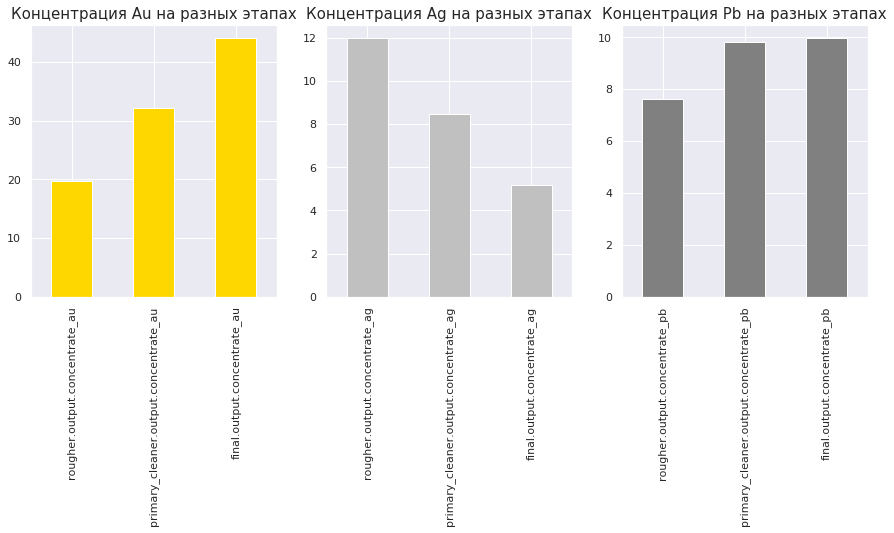

In [11]:
concentrate_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
plt.figure(figsize=(15, 5))
plt.subplot(131)
gold_full[concentrate_au].mean().plot(kind='bar', grid=True, color='gold')
plt.title('Концентрация Au на разных этапах', fontsize=15)
concentrate_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
plt.subplot(132)
gold_full[concentrate_ag].mean().plot(kind='bar', grid=True, color='silver')
plt.title('Концентрация Ag на разных этапах', fontsize=15)
concentrate_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
plt.subplot(133)
gold_full[concentrate_pb].mean().plot(kind='bar', grid=True, color='gray')
plt.title('Концентрация Pb на разных этапах', fontsize=15)

Text(0.5, 1.0, 'Концентрация металлов на разных этапах')

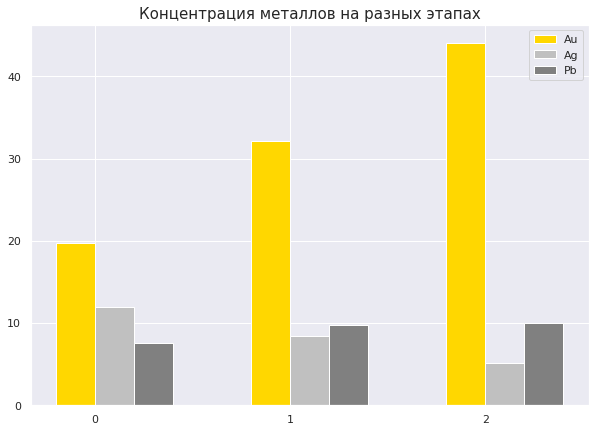

In [12]:
x = np.arange(3)  
width = 0.2 
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x - width/2, gold_full[concentrate_au].mean(), width, label='Au', color ='gold')
ax.bar(x + width/2, gold_full[concentrate_ag].mean(), width, label='Ag', color ='silver')
ax.bar(x + 3*width/2, gold_full[concentrate_pb].mean(), width, label='Pb', color ='gray')
ax.set_xticks(x)
plt.legend()
plt.grid(True)
plt.title('Концентрация металлов на разных этапах', fontsize=15)

Концентрация Au(золото) значительно повышается после каждого этапа, что указывает на хорошую эффективность очистки. Концентрация Ag(серебро) наоборот уменьшается, концентрация Pb(свинец) незначительно повышается.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

Text(0.5, 1.0, 'Размер гранул после грубой очистки')

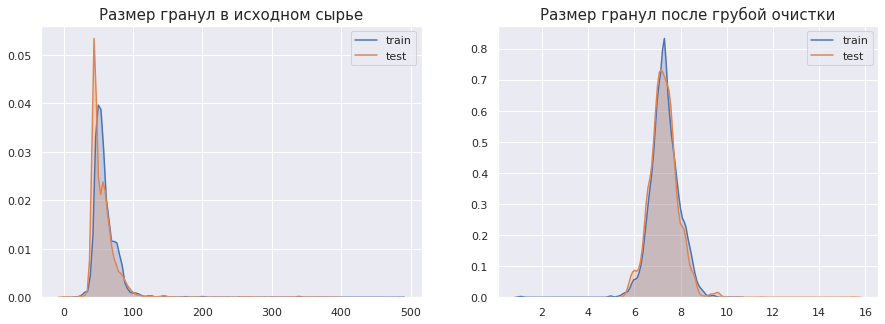

In [13]:
plt.figure(figsize=(15, 5)) 
plt.subplot(121) 
sns.kdeplot(gold_train['rougher.input.feed_size'], shade=True, label='train')
sns.kdeplot(gold_test['rougher.input.feed_size'], shade=True, label='test')
plt.title('Размер гранул в исходном сырье', fontsize='15')
plt.subplot(122)
sns.kdeplot(gold_train['primary_cleaner.input.feed_size'], shade=True, label='train')
sns.kdeplot(gold_test['primary_cleaner.input.feed_size'], shade=True, label='test')
plt.title('Размер гранул после грубой очистки', fontsize='15')


Распределения не сильно отличаются друг от друга, думаю оценка модели будет правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах:

Text(0.5, 1.0, 'Концентрация веществ в финальном концентрате')

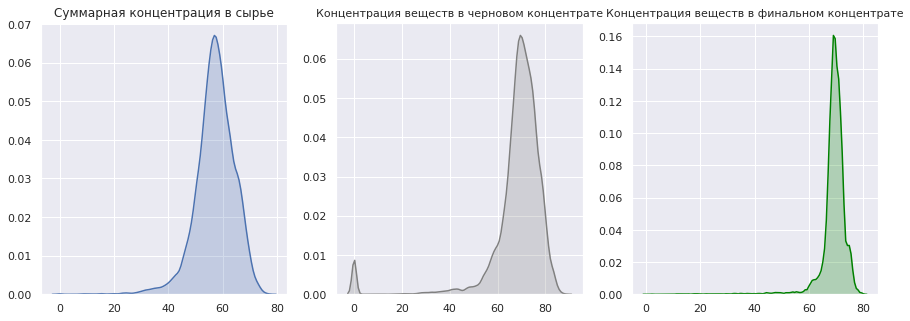

In [14]:
sum_rougher_input = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
plt.figure(figsize=(15, 5)) 
plt.subplot(131) 
sns.kdeplot(gold_full[sum_rougher_input].sum(axis=1), shade=True)
plt.title('Суммарная концентрация в сырье', fontsize='12')
plt.subplot(132)
sns.kdeplot(gold_full[[v for v in gold_full.columns if'rougher.output.concentrate' in v]].sum(axis=1), 
            shade=True, color='gray')
plt.title('Концентрация веществ в черновом концентрате', fontsize='11')
plt.subplot(133)
sns.kdeplot(gold_full[[v for v in gold_full.columns if'final.output.concentrate' in v]].sum(axis=1), 
            shade=True, color='green')
plt.title('Концентрация веществ в финальном концентрате', fontsize='11')



Присутствуют нулевые значения суммы всех веществ в черновом концентрате, чего в принципе быть не может. Проверим их количество:

In [15]:
len(gold_full[gold_full[[v for v in gold_full.columns if'rougher.output.concentrate' in v]].sum(axis=1) == 0])

394

Удалим эти значения из обучающей выборки. В тестовой выборке этих признаков нет:

In [16]:
gold_train['sum'] = gold_train[[v for v in gold_train.columns if'rougher.output.concentrate' in v]].sum(axis=1)
print(len(gold_train[gold_train['sum']==0]))
gold_train = gold_train.drop(gold_train[gold_train['sum'] == 0].index).drop(columns='sum')
gold_train.shape

297


(13852, 86)

Проверим нулевые значения на других этапах:

In [17]:
len(gold_full[gold_full[[v for v in gold_full.columns if'final.output.concentrate' in v]].sum(axis=1) == 0])

98

Удалим нулевые значения:

In [18]:
gold_train['sum'] = gold_train[[v for v in gold_train.columns if'final.output.concentrate' in v]].sum(axis=1)
print(len(gold_train[gold_train['sum']==0]))
gold_train = gold_train.drop(gold_train[gold_train['sum'] == 0].index).drop(columns='sum')
gold_train.shape

57


(13795, 86)

In [19]:
len(gold_full[gold_full[sum_rougher_input].sum(axis=1) == 0])

0

### Вывод.  
Проведён исследовательский анализ данных. Построены графики изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки. Концентрация Au значительно повышается после каждого этапа, концентрация Ag наоборот уменьшается, концентрация Pb незначительно повышается.  
Построены графики для сравнения распределения размеров гранул сырья на обучающей и тестовой выборках. Размеры гранул отличаются не критично.  
Также по графикам исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. По результатам удалены строки с аномальными значениями.

# 3. Модель

Напишем функцию для вычисления итоговой sMAPE:

In [21]:
def sMAPE(t, p):
    smape_rougher = 100/len(t) * np.sum(2 * np.abs(np.array(t)[:,0] - p[:,0]) / (np.abs(np.array(t)[:,0]) + np.abs(p[:,0])))
    smape_final = 100/len(t) * np.sum(2 * np.abs(np.array(t)[:,1] - p[:,1]) / (np.abs(np.array(t)[:,1]) + np.abs(p[:,1])))
    smape = 0.25 * smape_rougher + 0.75 * smape_final
    return smape

Обучим разные модели:

In [22]:
# Выделим обучающие и целевые признаки в обучающей и тестовой выборках. Отделим от обучающей выборки валидационную:
targets_test = gold_test[['rougher.output.recovery', 'final.output.recovery']]
features_test = gold_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
targets = gold_train[targets_test.columns]
features = gold_train[features_test.columns]

In [23]:
# Проведём стандартизацию признаков:
col = features.columns
scaler = StandardScaler()
scaler.fit(features)
features[col] = scaler.transform(features[col])
features_test[col] = scaler.transform(features_test[col])

Проверим модель DecisionTreeRegressor:

In [24]:
sMAPE_score = make_scorer(sMAPE)
for depth in range(1,20,2):
    tree_model = DecisionTreeRegressor(random_state = 12345, max_depth = depth)
    print(cross_val_score(tree_model, features, targets, cv=5, scoring = sMAPE_score).mean())
    print('Глубина дерева:', depth)

8.987481089659127
Глубина дерева: 1
9.17389887761556
Глубина дерева: 3
10.737343703311115
Глубина дерева: 5
11.879361611578464
Глубина дерева: 7
12.699984593138586
Глубина дерева: 9
13.353376049241238
Глубина дерева: 11
13.49244354333367
Глубина дерева: 13
13.865534528532915
Глубина дерева: 15
14.823037013245235
Глубина дерева: 17
14.063170958266559
Глубина дерева: 19


Проверим модель LinearRegression:

In [25]:
LR_model = LinearRegression(n_jobs=-1)
cross_val_score(LR_model, features, targets, cv=5, scoring = sMAPE_score).mean()

10.059602069093604

Проверим модель RandomForestRegressor:

In [26]:
forest_model = RandomForestRegressor(random_state = 12345)
forest_param = {'max_depth': range(1,10), 'n_estimators': range(1,40,10) }
forest_grid = GridSearchCV(forest_model, param_grid = forest_param, cv=5, n_jobs=-1,
verbose=True)
forest_grid.fit(features, targets)
print(forest_grid.best_params_)
forest_model = RandomForestRegressor(random_state = 12345,n_estimators = forest_grid.best_params_['n_estimators'],
                             max_depth = forest_grid.best_params_['max_depth'])
cross_val_score(forest_model, features, targets, cv=5, scoring = sMAPE_score).mean()

Fitting 5 folds for each of 171 candidates, totalling 855 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed: 185.6min finished


{'max_depth': 4, 'n_estimators': 31}


8.75035110030208

Лучший результат получился на модели RandomForestRegressor с параметрами n_estimators = 21, max_depth = 4. Её и применим для проверки на тестовой выборке:

In [28]:
model = RandomForestRegressor(random_state = 12345,n_estimators = 31,
                             max_depth = 4)
model.fit(features, targets)
predicted = model.predict(features_test)
print('sMAPE:', sMAPE(targets_test, predicted))

sMAPE: 9.172653769112157


### Вывод.  
Лучшей оказалась модель RandomForestRegressor(random_state = 12345,n_estimators = 21, max_depth = 4). На тестовой выборке эта модель показала результат sMAPE = 9.226.                            

## Общий вывод.  
Подготовлен прототип модели машинного обучения для компании «Цифры». Модель предсказывает коэффициент восстановления золота из золотосодержащей руды. Модель разработана на основе данных с параметрами добычи и очистки.  

Были импортированы данные из трёх файлов в 3 таблицы. Проведена предобработка данных. Далее проведён исследовательский анализ данных: построены графики изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки, построены графики для сравнения распределения размеров гранул сырья на обучающей и тестовой выборках.Также по графикам исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. По результатам исследования удалены строки с аномальными значениями.  
Написана функция для вычисления итоговой sMAPE. Обучены разные модели и оценено их качество кросс-валидацией. По результатам оценки лучшей моделью оказалась RandomForestRegressor с параметрами n_estimators = 21, max_depth = 4. После проверки этой модели на тестовой выборке итоговая sMAPE оказалась равна 9.226.